In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-precond-diagonal)

Here is an SPD matrix that arises from solving partial differential equations.

In [2]:
using MatrixDepot, SparseArrays
A = matrixdepot("wathen", 60)
n = size(A, 1)
@show n, nnz(A);

[ Info: verify download of index files...
[ Info: reading database


EOFError(

)


┌ Warning: recreating database file
└ @ MatrixDepot ~/.julia/packages/MatrixDepot/4S7Oa/src/download.jl:59
[ Info: reading index files
[ Info: adding metadata...
[ Info: adding svd data...


[ Info: writing database
┌ Warning: exception during initialization: 'KeyError(MatrixDepot)'
└ @ MatrixDepot ~/.julia/packages/MatrixDepot/4S7Oa/src/MatrixDepot.jl:125


(n, nnz(A)) = (11041, 170161)

```{index} ! Julia; DiagonalPreconditioner
```

There is an easy way to use the diagonal elements of $\mathbf{A}$, or any other vector, as a diagonal preconditioner.

In [3]:
using Preconditioners
b = ones(n)
M = DiagonalPreconditioner(diag(A));

We now compare CG with and without the preconditioner.

(time_plain, time_prec) = (0.492659958, 0.390840375)

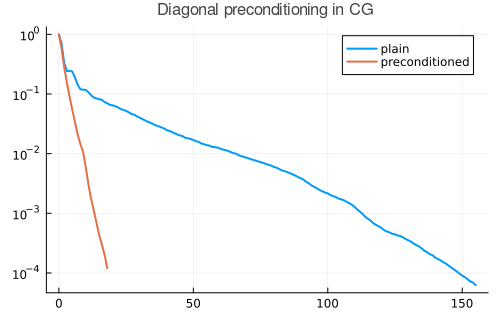

In [4]:
using IterativeSolvers
plain(b) = cg(A, b, maxiter=200, reltol=1e-4, log=true)
time_plain = @elapsed x, hist1 = plain(b)
prec(b) = cg(A, b, Pl=M, maxiter=200, reltol=1e-4, log=true)
time_prec = @elapsed x, hist2 = prec(b)
@show time_plain, time_prec

rr = hist1[:resnorm]
plot(0:length(rr)-1, rr / rr[1], yscale=:log10, label="plain")
rr = hist2[:resnorm]
plot!(0:length(rr)-1, rr / rr[1], yscale=:log10, label="preconditioned")
title!("Diagonal preconditioning in CG")

The diagonal preconditioner cut down substantially on the number of iterations. The effect on the total time is less dramatic, but this is not a large version of the problem.